# measures and fire

The purpose of the notebook is to visualise the impact of different type of fire on the system.
By different type of fire, we mean the modelisation of the fire, the law it follow, the different parameter of the law, the amplitude ...

In [65]:
exec(open("objet.py").read(), globals())

In [76]:
def measure(**kwargs):
    """solve the system several times with different perturbation in order to make an average"""
    Number_of_simulation = 100
    Variability = np.zeros(Number_of_simulation)
    Collapse = np.zeros_like(Variability)
    for i in range(Number_of_simulation):
        O = Ode(**kwargs)
        O.perturbation()
        Y = O.solve_by_part()
        Variability[i] = variability(Y)
#        print(collapse(Y))
        Collapse[i] = collapse(Y)   
    return np.mean(Variability), np.mean(Collapse)

### Study of the impact of fire frequency

In [77]:
exec(open("objet.py").read(), globals())

Freq = [0.001, 0.005, 0.01, 0.05, 0.1]

Param_freq = {"p":0.01}
Param_ampl = {"scale":0.07}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal"}


V = []
C = []
for i, freq in enumerate(Freq):
    Fire["param_freq"] = freq
    v, c = measure(Fire = Fire) #############" modifier objet, au début et à perturbation"
    V += [v]
    C += [c]

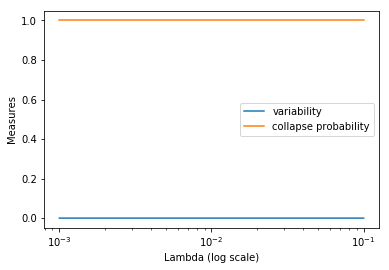

In [69]:
plt.semilogx(Freq, V, label="variability")
plt.semilogx(Freq, C, label="collapse probability")
plt.legend()
plt.xlabel("Lambda (log scale)")
plt.ylabel("Measures")
plt.show()